<a href="https://colab.research.google.com/github/marianatiele/projeto-mottu/blob/main/Case_Mottu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# O que o projeto precisa ter pra ser bom?

- Um bom projeto de Engenharia de Dados que chama a atenção deve ser **relevante**, **mensurável e completo** *(do dado bruto ao dado pronto para uso)*.



In [1]:
!pip install pandasql

  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26773 sha256=775f6a30a5c99d1412e84c35e073a771dfce776cac985df6a3467f442cb90434
  Stored in directory: /root/.cache/pip/wheels/15/a1/e7/6f92f295b5272ae5c02365e6b8fa19cb93f16a537090a1cf27
Successfully built pandasql


In [2]:
import pandas as pd
import numpy as np
import os
from pandasql import sqldf

## Obtendo os dados

In [3]:
os.listdir('/content/drive/MyDrive/Desafio_Mottu/')

['Q1_turnover_city_coverage.csv',
 'Q1_turnover_employees_FULL.csv',
 'Q1_turnover_mechanic_split.csv',
 'Q1_turnover_monthly_agg.csv']

In [4]:
# Path
path_mattu = os.path.dirname('/content/drive/MyDrive/Desafio_Mottu/')
path_agrecacao = os.listdir('/content/drive/MyDrive/Desafio_Mottu/')[2]
path_cidade = os.listdir('/content/drive/MyDrive/Desafio_Mottu/')[0]
path_empregados = os.listdir('/content/drive/MyDrive/Desafio_Mottu/')[1]
path_mecanico = os.listdir('/content/drive/MyDrive/Desafio_Mottu/')[3]

path_cidade = os.path.join(path_mattu, path_cidade)
path_agrecacao = os.path.join(path_mattu, path_agrecacao)
path_empregados = os.path.join(path_mattu, path_empregados)
path_mecanico = os.path.join(path_mattu, path_mecanico)


## Lendo do dados

In [5]:
colunas_agg = ['mes', 'grupo', 'ativo_mes', 'saidas_mes', 'turnover_mensal']


In [6]:
cidades = pd.read_csv(path_cidade, sep=';', encoding='ISO-8859-1')

In [7]:
agregacao = pd.read_csv(path_agrecacao,sep=';', encoding='ISO-8859-1')

In [8]:
mecanico = pd.read_csv(path_mecanico,sep=';', encoding='ISO-8859-1')

In [9]:
empregado =  pd.read_csv(path_empregados,sep=';', encoding='ISO-8859-1',dayfirst=True)

In [10]:
empregado.shape

(4600, 14)

In [11]:
cidades.head()

,cidade,mecanicos,certificados,pct_certificados
0,Belo Horizonte,54,16,"29,60%"
1,Belém,66,19,"28,80%"
2,Brasília,70,20,"28,60%"
3,Campinas,61,17,"27,90%"
4,Curitiba,49,19,"38,80%"


In [12]:
agregacao.drop(columns=['Unnamed: 5'], axis=1, inplace=True)
agregacao.head()

,mes,grupo,ativo_mes,saidas_mes,turnover_mensal
0,2024-01,mecanico_treinados,0,0,"0,00%"
1,2024-01,mecanico_nao_treinados,761,40,"5,26%"
2,2024-02,mecanico_treinados,0,0,"0,00%"
3,2024-02,mecanico_nao_treinados,841,38,"4,52%"
4,2024-03,mecanico_treinados,0,0,"0,00%"


In [13]:
empregado['data_demissao'] =  pd.to_datetime(empregado['data_demissao'], format="%d/%m/%Y", errors="coerce")
empregado['data_admissao'] =  pd.to_datetime(empregado['data_admissao'], format="%d/%m/%Y", errors="coerce")
empregado['data_certificacao'] =  pd.to_datetime(empregado['data_certificacao'], format="%d/%m/%Y", errors="coerce")

empregado.head()

,employee_id,cidade,cargo,lider_id,turno,salario_base,data_admissao,data_demissao,motivo_saida,faixa_preta_certificado,data_certificacao,nota_desempenho,faltas_trim,tempo_de_casa_meses
0,E100000,Natal,estoquista,L001,manha,"R$ 2.681,00",2024-06-10,NaT,NaN,False,NaT,"3,95",2,12
1,E100001,Florianópolis,mecanico,L011,noite,"R$ 3.537,00",2024-05-30,NaT,NaN,True,2025-03-14,"4,01",1,13
2,E100002,Natal,lider_area,L023,tarde,"R$ 5.929,00",2024-05-20,NaT,NaN,False,NaT,"4,13",1,13
3,E100003,Ribeirão Preto,motorista_campo,L033,tarde,"R$ 2.809,00",2023-12-21,NaT,NaN,False,NaT,"2,52",1,18
4,E100004,Recife,motorista_campo,L047,noite,"R$ 3.149,00",2024-01-30,NaT,NaN,False,NaT,"2,81",5,17


In [14]:
mecanico.head()

,mes,cargo,ativo_mes,saidas_mes,turnover_mensal
0,2024-01,mecanico,761,40,"5,26%"
1,2024-01,estoquista,210,14,"6,67%"
2,2024-01,soldador,120,2,"1,67%"
3,2024-01,front_atendimento,480,24,"5,00%"
4,2024-01,consultor_tecnico,246,11,"4,47%"


## Valores Null

In [15]:
mecanico.isnull().sum()

,0
mes,0
cargo,0
ativo_mes,0
saidas_mes,0
turnover_mensal,0


In [16]:
agregacao.isnull().sum()

,0
mes,0
grupo,0
ativo_mes,0
saidas_mes,0
turnover_mensal,0


In [17]:
empregado.isnull().sum()

,0
employee_id,0
cidade,0
cargo,0
lider_id,0
turno,0
salario_base,0
data_admissao,0
data_demissao,2689
motivo_saida,2689
faixa_preta_certificado,0


In [18]:
# Data demissao
2689 - 1911

778

In [19]:
# data Certificação
4239 - 361

3878

In [20]:
# data_demissao	2689 null e tem 1911, data_certificacao	4239 null tem 361

empregado.count()

,0
employee_id,4600
cidade,4600
cargo,4600
lider_id,4600
turno,4600
salario_base,4600
data_admissao,4600
data_demissao,1911
motivo_saida,1911
faixa_preta_certificado,4600


In [21]:
empregado['tempo_de_casa_meses'].value_counts()

,count
tempo_de_casa_meses,
13,331
12,316
15,286
14,283
20,276
18,274
16,271
17,255
23,254


In [22]:
empregado['data_certificacao'].drop_duplicates()

,data_certificacao
0,NaT
1,2025-03-14
21,2025-01-31
27,2025-03-11
59,2025-03-29
...,...
1809,2025-02-22
2040,2025-01-23
2113,2025-01-16
2851,2025-02-11


In [23]:
empregado['data_demissao'].drop_duplicates()

,data_demissao
0,NaT
7,2025-01-31
14,2024-10-31
15,2024-04-30
18,2024-12-31
26,2025-02-28
27,2025-06-30
28,2024-08-31
29,2024-05-31
31,2024-07-31


In [24]:
# Data da demissão aosente, o funcionário trabalha na empresa atualmente?

sqldf(''' select data_admissao,data_demissao, tempo_de_casa_meses from empregado ''')

,data_admissao,data_demissao,tempo_de_casa_meses
0,2024-06-10 00:00:00.000000,None,12
1,2024-05-30 00:00:00.000000,None,13
2,2024-05-20 00:00:00.000000,None,13
3,2023-12-21 00:00:00.000000,None,18
4,2024-01-30 00:00:00.000000,None,17
...,...,...,...
4595,2023-09-07 00:00:00.000000,None,21
4596,2024-03-03 00:00:00.000000,None,15
4597,2023-12-25 00:00:00.000000,2025-03-31 00:00:00.000000,15
4598,2024-05-30 00:00:00.000000,2025-01-31 00:00:00.000000,8


In [25]:
empregado.columns

Index(['employee_id', 'cidade', 'cargo', 'lider_id', 'turno', 'salario_base',
       'data_admissao', 'data_demissao', 'motivo_saida',
       'faixa_preta_certificado', 'data_certificacao', 'nota_desempenho',
       'faltas_trim', 'tempo_de_casa_meses'],
      dtype='object')

In [26]:
#
sqldf('''
      select faixa_preta_certificado, nota_desempenho,
      cargo, tempo_de_casa_meses, data_certificacao

    from empregado where data_certificacao is not null and cargo = 'mecanico'

''')

,faixa_preta_certificado,nota_desempenho,cargo,tempo_de_casa_meses,data_certificacao
0,1,"4,01",mecanico,13,2025-03-14 00:00:00.000000
1,1,"3,73",mecanico,17,2025-01-31 00:00:00.000000
2,1,"2,93",mecanico,22,2025-03-11 00:00:00.000000
3,1,"4,91",mecanico,14,2025-03-29 00:00:00.000000
4,1,"4,16",mecanico,19,2025-01-17 00:00:00.000000
...,...,...,...,...,...
356,1,"2,14",mecanico,20,2025-02-11 00:00:00.000000
357,1,"2,1",mecanico,5,2025-02-21 00:00:00.000000
358,1,"4,41",mecanico,20,2025-02-04 00:00:00.000000
359,1,"2,98",mecanico,13,2025-02-04 00:00:00.000000


In [27]:
cidades.isnull().sum()

,0
cidade,0
mecanicos,0
certificados,0
pct_certificados,0


## Tratando Dados

In [28]:
empregado['employee_id'] = empregado['employee_id'].astype('string')
empregado['cidade'] = empregado['cidade'].astype('string')
empregado['cargo'] = empregado['cargo'].astype('string')
empregado['lider_id'] = empregado['lider_id'].astype('string')
empregado['turno'] = empregado['turno'].astype('string')
empregado['salario_base'] = empregado['salario_base'].astype('string')
empregado['motivo_saida'] = empregado['motivo_saida'].astype('string')
empregado['nota_desempenho'] = empregado['nota_desempenho'].astype('string')

In [29]:
empregado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   employee_id              4600 non-null   string        
 1   cidade                   4600 non-null   string        
 2   cargo                    4600 non-null   string        
 3   lider_id                 4600 non-null   string        
 4   turno                    4600 non-null   string        
 5   salario_base             4600 non-null   string        
 6   data_admissao            4600 non-null   datetime64[ns]
 7   data_demissao            1911 non-null   datetime64[ns]
 8   motivo_saida             1911 non-null   string        
 9   faixa_preta_certificado  4600 non-null   bool          
 10  data_certificacao        361 non-null    datetime64[ns]
 11  nota_desempenho          4600 non-null   string        
 12  faltas_trim              4600 non-

In [30]:
empregado.drop(columns=['data_admissao', 'data_demissao', 'data_certificacao']).describe()

,faltas_trim,tempo_de_casa_meses
count,4600.000000,4600.000000
mean,1.984348,13.800000
std,1.388838,6.440994
min,0.000000,0.000000
25%,1.000000,10.000000
50%,2.000000,15.000000
75%,3.000000,19.000000
max,9.000000,23.000000


In [31]:
mecanico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   mes              180 non-null    object
 1   cargo            180 non-null    object
 2   ativo_mes        180 non-null    int64 
 3   saidas_mes       180 non-null    int64 
 4   turnover_mensal  180 non-null    object
dtypes: int64(2), object(3)
memory usage: 7.2+ KB


In [32]:
# Criar nova coluna com a % do turnover_mensal apenas para fins de cálculo
mecanico['num_turnover_mensal'] = mecanico['turnover_mensal']
mecanico['num_turnover_mensal']  = mecanico['num_turnover_mensal'].str.replace(',','.')
mecanico['num_turnover_mensal'] = mecanico['num_turnover_mensal'].str.replace('%','')
mecanico['num_turnover_mensal'] = mecanico['num_turnover_mensal'].astype('float')

In [33]:
mecanico['cargo'] = mecanico['cargo'].astype('string')
mecanico['mes'] = mecanico['mes'].astype('string')

In [34]:
mecanico.describe()

,ativo_mes,saidas_mes,num_turnover_mensal
count,180.000000,180.000000,180.000000
mean,665.022222,21.177778,3.018333
std,922.506701,30.187710,1.212217
min,107.000000,1.000000,0.570000
25%,246.750000,5.000000,2.037500
50%,320.000000,10.000000,3.025000
75%,580.250000,19.000000,3.680000
max,3974.000000,130.000000,6.670000


In [35]:
cidades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   cidade            20 non-null     object
 1   mecanicos         20 non-null     int64 
 2   certificados      20 non-null     int64 
 3   pct_certificados  20 non-null     object
dtypes: int64(2), object(2)
memory usage: 772.0+ bytes


In [36]:
cidades['cidade'] = cidades['cidade'].astype('string')
cidades['pct_certificados'] = cidades['pct_certificados'].astype('string')

In [37]:
cidades.describe()

,mecanicos,certificados
count,20.000000,20.000000
mean,64.050000,17.800000
std,8.363297,4.763899
min,49.000000,10.000000
25%,58.500000,14.000000
50%,65.000000,18.000000
75%,70.250000,20.500000
max,77.000000,27.000000


In [38]:
agregacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   mes              36 non-null     object
 1   grupo            36 non-null     object
 2   ativo_mes        36 non-null     int64 
 3   saidas_mes       36 non-null     int64 
 4   turnover_mensal  36 non-null     object
dtypes: int64(2), object(3)
memory usage: 1.5+ KB


In [39]:
agregacao['mes'] = agregacao['mes'].astype('string')
agregacao['grupo'] = agregacao['grupo'].astype('string')
agregacao['turnover_mensal'] = agregacao['turnover_mensal'].astype('string')

agregacao['num_turnover_mensal'] = agregacao['turnover_mensal']
agregacao['num_turnover_mensal']  = agregacao['num_turnover_mensal'].str.replace(',','.')
agregacao['num_turnover_mensal'] = agregacao['num_turnover_mensal'].str.replace('%','')
agregacao['num_turnover_mensal'] = agregacao['num_turnover_mensal'].astype('float')


In [40]:
# agregacao

## Análise Exploratória dos Dados

In [41]:
empregado['tempo_de_casa_meses'].value_counts() #frequencia que aparece na coluna

,count
tempo_de_casa_meses,
13,331
12,316
15,286
14,283
20,276
18,274
16,271
17,255
23,254


In [42]:
cidades[cidades['cidade'] == 'São Paulo']

,cidade,mecanicos,certificados,pct_certificados
17,São Paulo,67,18,"26,90%"


In [43]:
cidades[cidades['cidade'] == 'Salvador']

,cidade,mecanicos,certificados,pct_certificados
15,Salvador,59,14,"23,70%"


In [44]:
empregado['motivo_saida'].drop_duplicates()

,motivo_saida
0,<NA>
7,pedido
15,outros
27,desempenho
39,transferencia
105,justa_causa


In [45]:
empregado['motivo_saida'][empregado['motivo_saida'] == 'justa_causa'].count()

np.int64(83)

In [46]:
empregado[empregado['motivo_saida'] == 'justa_causa']

,employee_id,cidade,cargo,lider_id,turno,salario_base,data_admissao,data_demissao,motivo_saida,faixa_preta_certificado,data_certificacao,nota_desempenho,faltas_trim,tempo_de_casa_meses
105,E100105,Fortaleza,mecanico,L040,manha,"R$ 3.487,00",2023-10-06,2024-02-29,justa_causa,False,NaT,"2,81",1,4
155,E100155,Manaus,mecanico,L049,tarde,"R$ 3.333,00",2024-03-24,2024-06-30,justa_causa,False,NaT,"2,62",2,3
174,E100174,Brasília,mecanico,L051,tarde,"R$ 3.140,00",2023-10-27,2024-05-31,justa_causa,True,2025-03-17,"3,37",1,7
187,E100187,São Paulo,mecanico,L013,noite,"R$ 3.022,00",2023-12-02,2024-01-31,justa_causa,True,2025-02-14,"3,45",0,1
197,E100197,Natal,soldador,L005,tarde,"R$ 3.152,00",2024-03-29,2024-10-31,justa_causa,False,NaT,"3,25",1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4370,E104370,Rio de Janeiro,lider_geral,L052,manha,"R$ 8.097,00",2023-12-29,2025-02-28,justa_causa,False,NaT,"2,55",1,14
4411,E104411,Rio de Janeiro,organizador_patio,L010,tarde,"R$ 2.443,00",2024-05-06,2025-02-28,justa_causa,False,NaT,"3,48",2,9
4436,E104436,Fortaleza,mecanico,L009,tarde,"R$ 3.461,00",2023-09-29,2024-07-31,justa_causa,False,NaT,"3,4",3,10
4442,E104442,Curitiba,front_atendimento,L008,manha,"R$ 2.411,00",2024-02-11,2024-01-31,justa_causa,False,NaT,"2,66",5,0


- **Fazendo agrupamentos**

In [47]:
empregado.groupby(['motivo_saida']).count()

,employee_id,cidade,cargo,lider_id,turno,salario_base,data_admissao,data_demissao,faixa_preta_certificado,data_certificacao,nota_desempenho,faltas_trim,tempo_de_casa_meses
motivo_saida,,,,,,,,,,,,,
desempenho,397,397,397,397,397,397,397,397,397,25,397,397,397
justa_causa,83,83,83,83,83,83,83,83,83,5,83,83,83
outros,240,240,240,240,240,240,240,240,240,19,240,240,240
pedido,1057,1057,1057,1057,1057,1057,1057,1057,1057,70,1057,1057,1057
transferencia,134,134,134,134,134,134,134,134,134,11,134,134,134


In [48]:
empregado.select_dtypes(include='string')

,employee_id,cidade,cargo,lider_id,turno,salario_base,motivo_saida,nota_desempenho
0,E100000,Natal,estoquista,L001,manha,"R$ 2.681,00",<NA>,"3,95"
1,E100001,Florianópolis,mecanico,L011,noite,"R$ 3.537,00",<NA>,"4,01"
2,E100002,Natal,lider_area,L023,tarde,"R$ 5.929,00",<NA>,"4,13"
3,E100003,Ribeirão Preto,motorista_campo,L033,tarde,"R$ 2.809,00",<NA>,"2,52"
4,E100004,Recife,motorista_campo,L047,noite,"R$ 3.149,00",<NA>,"2,81"
...,...,...,...,...,...,...,...,...
4595,E104595,São Paulo,motorista_campo,L013,tarde,"R$ 2.933,00",<NA>,"3,64"
4596,E104596,Goiânia,soldador,L028,manha,"R$ 2.842,00",<NA>,"3,79"
4597,E104597,Belo Horizonte,soldador,L057,tarde,"R$ 3.059,00",pedido,"2,41"
4598,E104598,Recife,organizador_patio,L038,manha,"R$ 2.198,00",pedido,"4,48"


In [49]:
# empregado.select_dtypes(include='number').columns.to_list() # se precisar listar os numeros do dataframe

empregado.select_dtypes(include='number')

,faltas_trim,tempo_de_casa_meses
0,2,12
1,1,13
2,1,13
3,1,18
4,5,17
...,...,...
4595,3,21
4596,4,15
4597,0,15
4598,0,8


In [50]:
empregado.columns

Index(['employee_id', 'cidade', 'cargo', 'lider_id', 'turno', 'salario_base',
       'data_admissao', 'data_demissao', 'motivo_saida',
       'faixa_preta_certificado', 'data_certificacao', 'nota_desempenho',
       'faltas_trim', 'tempo_de_casa_meses'],
      dtype='object')

In [51]:
# Queria saber a média de tempo de casa por cargo ?
tempo_casa = empregado.select_dtypes(include='number').columns.to_list()
empregado.groupby(['cargo'])[tempo_casa].mean()

,faltas_trim,tempo_de_casa_meses
cargo,,
consultor_tecnico,1.950237,13.952607
estoquista,1.941989,13.422652
front_atendimento,1.992762,13.125452
lider_area,1.965602,15.154791
lider_geral,2.016304,15.706522
mecanico,2.005464,13.748634
motorista_campo,2.027083,13.329167
organizador_patio,1.923261,13.942446
soldador,1.995413,13.623853


## Tratando Dados

In [52]:
empregado.head()

,employee_id,cidade,cargo,lider_id,turno,salario_base,data_admissao,data_demissao,motivo_saida,faixa_preta_certificado,data_certificacao,nota_desempenho,faltas_trim,tempo_de_casa_meses
0,E100000,Natal,estoquista,L001,manha,"R$ 2.681,00",2024-06-10,NaT,<NA>,False,NaT,"3,95",2,12
1,E100001,Florianópolis,mecanico,L011,noite,"R$ 3.537,00",2024-05-30,NaT,<NA>,True,2025-03-14,"4,01",1,13
2,E100002,Natal,lider_area,L023,tarde,"R$ 5.929,00",2024-05-20,NaT,<NA>,False,NaT,"4,13",1,13
3,E100003,Ribeirão Preto,motorista_campo,L033,tarde,"R$ 2.809,00",2023-12-21,NaT,<NA>,False,NaT,"2,52",1,18
4,E100004,Recife,motorista_campo,L047,noite,"R$ 3.149,00",2024-01-30,NaT,<NA>,False,NaT,"2,81",5,17


In [53]:
empregado['data_certificacao'].isna().sum()

np.int64(4239)

In [54]:
empregado['motivo_saida'].isna().sum()

np.int64(2689)

In [55]:
empregado['data_demissao'].isna().sum()

np.int64(2689)

In [56]:
# empregado[empregado['motivo_saida'] == 'outros'].count()
empregado.groupby(['motivo_saida']).count()

,employee_id,cidade,cargo,lider_id,turno,salario_base,data_admissao,data_demissao,faixa_preta_certificado,data_certificacao,nota_desempenho,faltas_trim,tempo_de_casa_meses
motivo_saida,,,,,,,,,,,,,
desempenho,397,397,397,397,397,397,397,397,397,25,397,397,397
justa_causa,83,83,83,83,83,83,83,83,83,5,83,83,83
outros,240,240,240,240,240,240,240,240,240,19,240,240,240
pedido,1057,1057,1057,1057,1057,1057,1057,1057,1057,70,1057,1057,1057
transferencia,134,134,134,134,134,134,134,134,134,11,134,134,134


In [57]:
# def ajusta_motivo(dados):
#   """
#   Ajusta valor <NA> em motivo_saida para outros
#   """
#   if [dados['motivo_saida'] == 'NA']:
#     dados['motivo_saida'] = dados['motivo_saida'].fillna('outros')
#     return dados


In [59]:
empregado['motivo_saida'].value_counts()

,count
motivo_saida,
pedido,1057
desempenho,397
outros,240
transferencia,134
justa_causa,83


## Anaisando o Case
- No começo de 2025 lançamos o
programa “Mecânicos Faixa Preta”, uma trilha técnica avançada ministrada por instrutores
da matriz. A proposta é simples e direta: elevar o nível técnico e reduzir o turnover entre
mecânicos. Até junho de 2025, cerca de 30% dos mecânicos já estavam certificados.
Mesmo assim, quando olhamos o consolidado da operação, o turnover segue estável, perto
de 30%. Queremos entender o que está acontecendo.
- Objetivo
Sua missão é avaliar, com base nas bases de dados e no período de janeiro/2024 a
junho/2025, se o programa Mecânicos Faixa Preta está funcionando para o público-alvo e
por que o indicador agregado ainda não cede. Espera-se que você, antes de tirar
conclusões gerais, aprofunde e aponte priorizações claras. No final, traga uma análise do
resultado até aqui, um plano curto e viável de ações, ajustes no programa e um jeito simples
de acompanhar a evolução. Seja objetivo, prático e honesto sobre limitações da análise.
- Definições e premissas
• Turnover mensal = saidas_mes / ativo_mes no mesmo mês.
• Heterogeneidades relevantes: cargo, cidade, turno, tempo de casa, liderança local
e sazonalidade.
- Dicas (não obrigatórias)
• Tempo de casa pesa: recém-chegados tendem a sair mais. Faça cortes por
tenure.
• Turno e liderança local podem explicar diferenças rápidas de atuar.
• Se quiser sustentar causalidade no futuro, proponha pilotos com grupo controle
por cidade ou base de líderes.

In [60]:
empregado.head(2)

,employee_id,cidade,cargo,lider_id,turno,salario_base,data_admissao,data_demissao,motivo_saida,faixa_preta_certificado,data_certificacao,nota_desempenho,faltas_trim,tempo_de_casa_meses
0,E100000,Natal,estoquista,L001,manha,"R$ 2.681,00",2024-06-10,NaT,<NA>,False,NaT,"3,95",2,12
1,E100001,Florianópolis,mecanico,L011,noite,"R$ 3.537,00",2024-05-30,NaT,<NA>,True,2025-03-14,"4,01",1,13


## Separando os mecanicos em grupos treinados e não treinados

In [61]:
mecanicos_treinado = sqldf('''
        select * from agregacao where grupo = 'mecanico_treinados'
''')

In [62]:
# mecanicos treinados de janeiro de 2025 até junho


sqldf( ''' select * from mecanicos_treinado where mes >= '2025-01' ''')

,mes,grupo,ativo_mes,saidas_mes,turnover_mensal,num_turnover_mensal
0,2025-01,mecanico_treinados,45,0,"0,00%",0.00
1,2025-02,mecanico_treinados,136,6,"4,41%",4.41
2,2025-03,mecanico_treinados,232,9,"3,88%",3.88
3,2025-04,mecanico_treinados,223,6,"2,69%",2.69
4,2025-05,mecanico_treinados,217,1,"0,46%",0.46
5,2025-06,mecanico_treinados,216,4,"1,85%",1.85


In [63]:
mecanico_nao_treinado = sqldf('''
        select * from agregacao where grupo = 'mecanico_nao_treinados'
''')

In [64]:
mecanico_nao_treinado

,mes,grupo,ativo_mes,saidas_mes,turnover_mensal,num_turnover_mensal
0,2024-01,mecanico_nao_treinados,761,40,"5,26%",5.26
1,2024-02,mecanico_nao_treinados,841,38,"4,52%",4.52
2,2024-03,mecanico_nao_treinados,901,33,"3,66%",3.66
3,2024-04,mecanico_nao_treinados,975,44,"4,51%",4.51
4,2024-05,mecanico_nao_treinados,1040,38,"3,65%",3.65
5,2024-06,mecanico_nao_treinados,1088,39,"3,58%",3.58
6,2024-07,mecanico_nao_treinados,1049,32,"3,05%",3.05
7,2024-08,mecanico_nao_treinados,1017,32,"3,15%",3.15
8,2024-09,mecanico_nao_treinados,985,43,"4,37%",4.37
9,2024-10,mecanico_nao_treinados,942,34,"3,61%",3.61


- **Trunover mensal de ambos os grupos**

In [65]:
mecanico_nao_treinado['num_turnover_mensal'].sum()

np.float64(64.25)

In [66]:
mecanicos_treinado['num_turnover_mensal'].sum()

np.float64(13.290000000000001)

In [67]:
# mecanico['num_turnover_mensal'].sum()
sqldf('''
  select sum(num_turnover_mensal)as soma_mecanico_turnover from mecanico where cargo = 'mecanico'

''')

,soma_mecanico_turnover
0,63.29


In [68]:
# mecanicos não treinados de janeiro de 2025 até junho

sqldf( ''' select * from mecanico_nao_treinado where mes >= '2025-01' ''')

,mes,grupo,ativo_mes,saidas_mes,turnover_mensal,num_turnover_mensal
0,2025-01,mecanico_nao_treinados,810,27,"3,33%",3.33
1,2025-02,mecanico_nao_treinados,692,25,"3,61%",3.61
2,2025-03,mecanico_nao_treinados,565,23,"4,07%",4.07
3,2025-04,mecanico_nao_treinados,542,13,"2,40%",2.40
4,2025-05,mecanico_nao_treinados,529,15,"2,84%",2.84
5,2025-06,mecanico_nao_treinados,514,14,"2,72%",2.72


- reduzir o turnover entre mecânicos. Ao comparar o mecênicostreinados de não treinados?

- turnover desses dois grupos, você consegue responder à pergunta principal do desafio: "o programa Mecânicos Faixa Preta está funcionando para o público-alvo?

- Se o turnover for:

- Menor nos Certificados: O programa está gerando retenção no grupo em que foi aplicado (Mecânicos).

- Semelhante ou Maior nos Certificados: O programa não está gerando retenção, mesmo no público-alvo.

In [69]:
# Mecanicos não certificado

sqldf('''
      select distinct grupo, sum(num_turnover_mensal) from agregacao  where grupo = 'mecanico_nao_treinados'

''')

,grupo,sum(num_turnover_mensal)
0,mecanico_nao_treinados,64.25


In [70]:
# Mecanicos certificado

sqldf('''
      select distinct grupo, sum(num_turnover_mensal) from agregacao  where grupo = 'mecanico_treinados'

''')

,grupo,sum(num_turnover_mensal)
0,mecanico_treinados,13.29


- Heterogeneidades relevantes: cargo, cidade, turno, tempo de casa, liderança local e sazonalidade.

In [71]:
sqldf('''
      select cargo, cidade, turno, tempo_de_casa_meses, lider_id

      from empregado

      where cargo = 'mecanico'

''')

,cargo,cidade,turno,tempo_de_casa_meses,lider_id
0,mecanico,Florianópolis,noite,13,L011
1,mecanico,São Luís,tarde,23,L030
2,mecanico,Porto Alegre,manha,23,L037
3,mecanico,Belém,tarde,14,L028
4,mecanico,Natal,manha,14,L005
...,...,...,...,...,...
1276,mecanico,Ribeirão Preto,tarde,14,L039
1277,mecanico,Brasília,manha,15,L007
1278,mecanico,Natal,manha,20,L051
1279,mecanico,Salvador,noite,22,L048


In [72]:
# Pessoas com mas de um ano na empresa


sqldf('''
      select cargo, cidade, turno, tempo_de_casa_meses, lider_id

      from empregado

      where cargo = 'mecanico' and tempo_de_casa_meses >= 12

''')

,cargo,cidade,turno,tempo_de_casa_meses,lider_id
0,mecanico,Florianópolis,noite,13,L011
1,mecanico,São Luís,tarde,23,L030
2,mecanico,Porto Alegre,manha,23,L037
3,mecanico,Belém,tarde,14,L028
4,mecanico,Natal,manha,14,L005
...,...,...,...,...,...
899,mecanico,Ribeirão Preto,tarde,14,L039
900,mecanico,Brasília,manha,15,L007
901,mecanico,Natal,manha,20,L051
902,mecanico,Salvador,noite,22,L048


- **Turno e liderança local podem explicar diferenças rápidas de atuar. **

In [73]:
empregado['faixa_preta_certificado'].drop_duplicates()

,faixa_preta_certificado
0,False
1,True


In [74]:
empregado.isnull().sum()

,0
employee_id,0
cidade,0
cargo,0
lider_id,0
turno,0
salario_base,0
data_admissao,0
data_demissao,2689
motivo_saida,2689
faixa_preta_certificado,0


In [75]:
sqldf('''
  select * from empregado where  faixa_preta_certificado = true

''')

,employee_id,cidade,cargo,lider_id,turno,salario_base,data_admissao,data_demissao,motivo_saida,faixa_preta_certificado,data_certificacao,nota_desempenho,faltas_trim,tempo_de_casa_meses
0,E100001,Florianópolis,mecanico,L011,noite,"R$ 3.537,00",2024-05-30 00:00:00.000000,None,None,1,2025-03-14 00:00:00.000000,"4,01",1,13
1,E100021,Florianópolis,mecanico,L034,tarde,"R$ 3.547,00",2024-01-11 00:00:00.000000,None,None,1,2025-01-31 00:00:00.000000,"3,73",6,17
2,E100027,Maceió,mecanico,L031,noite,"R$ 2.929,00",2023-08-24 00:00:00.000000,2025-06-30 00:00:00.000000,desempenho,1,2025-03-11 00:00:00.000000,"2,93",4,22
3,E100059,Campinas,mecanico,L039,manha,"R$ 3.324,00",2024-04-22 00:00:00.000000,None,None,1,2025-03-29 00:00:00.000000,"4,91",2,14
4,E100092,Fortaleza,mecanico,L055,manha,"R$ 2.948,00",2023-11-28 00:00:00.000000,None,None,1,2025-01-17 00:00:00.000000,"4,16",1,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356,E104520,Brasília,mecanico,L047,manha,"R$ 3.584,00",2023-10-31 00:00:00.000000,None,None,1,2025-02-11 00:00:00.000000,"2,14",4,20
357,E104521,Recife,mecanico,L001,tarde,"R$ 2.964,00",2023-10-17 00:00:00.000000,2024-03-31 00:00:00.000000,outros,1,2025-02-21 00:00:00.000000,"2,1",2,5
358,E104525,Goiânia,mecanico,L034,noite,"R$ 3.018,00",2023-10-03 00:00:00.000000,None,None,1,2025-02-04 00:00:00.000000,"4,41",3,20
359,E104536,Maceió,mecanico,L007,manha,"R$ 3.619,00",2023-10-04 00:00:00.000000,2024-11-30 00:00:00.000000,outros,1,2025-02-04 00:00:00.000000,"2,98",5,13


In [76]:
# cargo =  mecanico
#  Todos os mecâncos certificados

sqldf('''
    select cidade, cargo, turno, salario_base, motivo_saida,
    faixa_preta_certificado, 	data_certificacao, 	nota_desempenho, 	faltas_trim, 	tempo_de_casa_meses

    from empregado where cargo = 'mecanico' and  faixa_preta_certificado = true


''')

,cidade,cargo,turno,salario_base,motivo_saida,faixa_preta_certificado,data_certificacao,nota_desempenho,faltas_trim,tempo_de_casa_meses
0,Florianópolis,mecanico,noite,"R$ 3.537,00",None,1,2025-03-14 00:00:00.000000,"4,01",1,13
1,Florianópolis,mecanico,tarde,"R$ 3.547,00",None,1,2025-01-31 00:00:00.000000,"3,73",6,17
2,Maceió,mecanico,noite,"R$ 2.929,00",desempenho,1,2025-03-11 00:00:00.000000,"2,93",4,22
3,Campinas,mecanico,manha,"R$ 3.324,00",None,1,2025-03-29 00:00:00.000000,"4,91",2,14
4,Fortaleza,mecanico,manha,"R$ 2.948,00",None,1,2025-01-17 00:00:00.000000,"4,16",1,19
...,...,...,...,...,...,...,...,...,...,...
356,Brasília,mecanico,manha,"R$ 3.584,00",None,1,2025-02-11 00:00:00.000000,"2,14",4,20
357,Recife,mecanico,tarde,"R$ 2.964,00",outros,1,2025-02-21 00:00:00.000000,"2,1",2,5
358,Goiânia,mecanico,noite,"R$ 3.018,00",None,1,2025-02-04 00:00:00.000000,"4,41",3,20
359,Maceió,mecanico,manha,"R$ 3.619,00",outros,1,2025-02-04 00:00:00.000000,"2,98",5,13


In [77]:
sqldf('''
  select * from mecanico where cargo = 'lider_area' or cargo = 'lider_geral'

''').drop_duplicates()

,mes,cargo,ativo_mes,saidas_mes,turnover_mensal,num_turnover_mensal
0,2024-01,lider_area,247,8,"3,24%",3.24
1,2024-01,lider_geral,107,1,"0,93%",0.93
2,2024-02,lider_area,277,8,"2,89%",2.89
3,2024-02,lider_geral,127,4,"3,15%",3.15
4,2024-03,lider_area,299,6,"2,01%",2.01
5,2024-03,lider_geral,136,3,"2,21%",2.21
6,2024-04,lider_area,328,6,"1,83%",1.83
7,2024-04,lider_geral,143,2,"1,40%",1.40
8,2024-05,lider_area,353,8,"2,27%",2.27
9,2024-05,lider_geral,155,5,"3,23%",3.23


## Questão 2 -
- Responder

## **Gráficos**

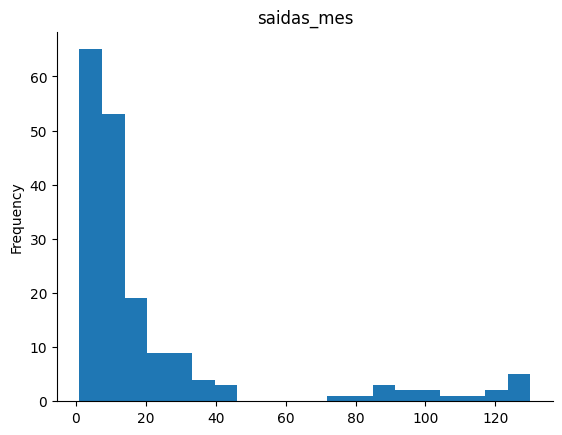

In [80]:
from matplotlib import pyplot as plt
mecanico['saidas_mes'].plot(kind='hist', bins=20, title='saidas_mes')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [81]:
# Turnover mensal = saidas_mes / ativo_mes

agregacao[agregacao['grupo'] == 'mecanico_treinados']

,mes,grupo,ativo_mes,saidas_mes,turnover_mensal,num_turnover_mensal
0,2024-01,mecanico_treinados,0,0,"0,00%",0.00
2,2024-02,mecanico_treinados,0,0,"0,00%",0.00
4,2024-03,mecanico_treinados,0,0,"0,00%",0.00
6,2024-04,mecanico_treinados,0,0,"0,00%",0.00
8,2024-05,mecanico_treinados,0,0,"0,00%",0.00
10,2024-06,mecanico_treinados,0,0,"0,00%",0.00
12,2024-07,mecanico_treinados,0,0,"0,00%",0.00
14,2024-08,mecanico_treinados,0,0,"0,00%",0.00
16,2024-09,mecanico_treinados,0,0,"0,00%",0.00
18,2024-10,mecanico_treinados,0,0,"0,00%",0.00


In [82]:
print(sqldf('''select grupo, ativo_mes, saidas_mes, turnover_mensal
            from agregacao where grupo = 'mecanico_treinados' and ativo_mes >= 45 '''))

                grupo  ativo_mes  saidas_mes turnover_mensal
0  mecanico_treinados         45           0           0,00%
1  mecanico_treinados        136           6           4,41%
2  mecanico_treinados        232           9           3,88%
3  mecanico_treinados        223           6           2,69%
4  mecanico_treinados        217           1           0,46%
5  mecanico_treinados        216           4           1,85%
